In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('mcgc.tsv', sep= '\t')
df.head(10)

,time,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12
0,0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,15,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,30,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,45,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,60,0.003,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
5,75,0.003,0.002,0.003,0.002,0.002,0.003,0.002,0.003,0.003,...,0.003,0.002,0.002,0.002,0.002,0.003,0.002,0.002,0.003,0.003
6,90,0.003,0.002,0.003,0.002,0.003,0.003,0.003,0.003,0.003,...,0.003,0.002,0.002,0.002,0.002,0.003,0.003,0.002,0.003,0.003
7,105,0.004,0.003,0.003,0.002,0.003,0.003,0.003,0.003,0.003,...,0.004,0.002,0.003,0.002,0.003,0.004,0.003,0.003,0.003,0.004
8,120,0.005,0.003,0.004,0.003,0.003,0.004,0.003,0.004,0.004,...,0.005,0.002,0.003,0.002,0.003,0.005,0.003,0.003,0.004,0.005
9,135,0.007,0.003,0.005,0.003,0.004,0.005,0.004,0.005,0.005,...,0.006,0.003,0.003,0.003,0.003,0.006,0.003,0.003,0.005,0.006


In [3]:
df.shape

(97, 37)

In [4]:
# Step 2: Define strain groups (WT vs. MUT)
strain_groups = {
    "Strain1_WT": ["A1", "A3", "B1", "B3", "C1", "C3"],
    "Strain1_MUT": ["A2", "A4", "B2", "B4", "C2", "C4"],
    "Strain2_WT": ["A5", "A7", "B5", "B7", "C5", "C7"],
    "Strain2_MUT": ["A6", "A8", "B6", "B8", "C6", "C8"],
    "Strain3_WT": ["A9", "B9", "C9"],
    "Strain3_MUT": ["A10", "B10", "C10"],
}


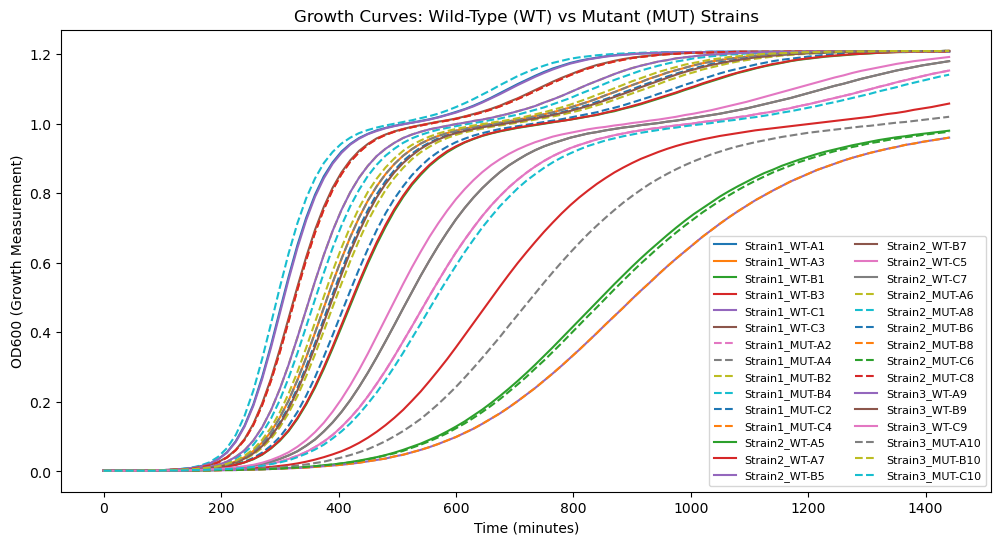

In [5]:
# Step 3: Plot growth curves for WT vs MUT
plt.figure(figsize=(12, 6))

# Loop through each strain and its related columns
for strain_name, od_values in strain_groups.items():
    for od_column in od_values:
        # Plot WT with a solid line, MUT with a dashed line
        line_style = 'dashed' if "MUT" in strain_name else 'solid'
        sns.lineplot(x=df["time"], y=df[od_column], label=f"{strain_name}-{od_column}", linestyle=line_style)

# Add labels and title
plt.xlabel("Time (minutes)")
plt.ylabel("OD600 (Growth Measurement)")
plt.title("Growth Curves: Wild-Type (WT) vs Mutant (MUT) Strains")
plt.legend(ncol=2, fontsize=8)
plt.show()


In [6]:
# Step 4: Function to determine carrying capacity time
def get_carrying_capacity_time(df, columns):
    carrying_times = {}
    for col in columns:
        max_od = df[col].max()
        threshold = 0.95 * max_od  # 95% of max OD600
        carrying_time = df[df[col] >= threshold]['time'].min()
        carrying_times[col] = carrying_time
    return carrying_times

In [7]:
# Compute carrying capacity times
wt_times = get_carrying_capacity_time(df, [col for strain, cols in strain_groups.items() 
                                           if "WT" in strain for col in cols])
mut_times = get_carrying_capacity_time(df, [col for strain, cols in strain_groups.items() 
                                            if "MUT" in strain for col in cols])

In [8]:
# Convert results into a DataFrame
carrying_df = pd.DataFrame({
    "Strain": list(wt_times.keys()) + list(mut_times.keys()),
    "Time_to_Carrying_Capacity": list(wt_times.values()) + list(mut_times.values()),
    "Type": ["WT"] * len(wt_times) + ["MUT"] * len(mut_times)
})

carrying_df

,Strain,Time_to_Carrying_Capacity,Type
0,A1,750,WT
1,A3,975,WT
2,B1,1260,WT
3,B3,1245,WT
4,C1,1305,WT
5,C3,810,WT
6,A5,1095,WT
7,A7,1095,WT
8,B5,765,WT
9,B7,1275,WT


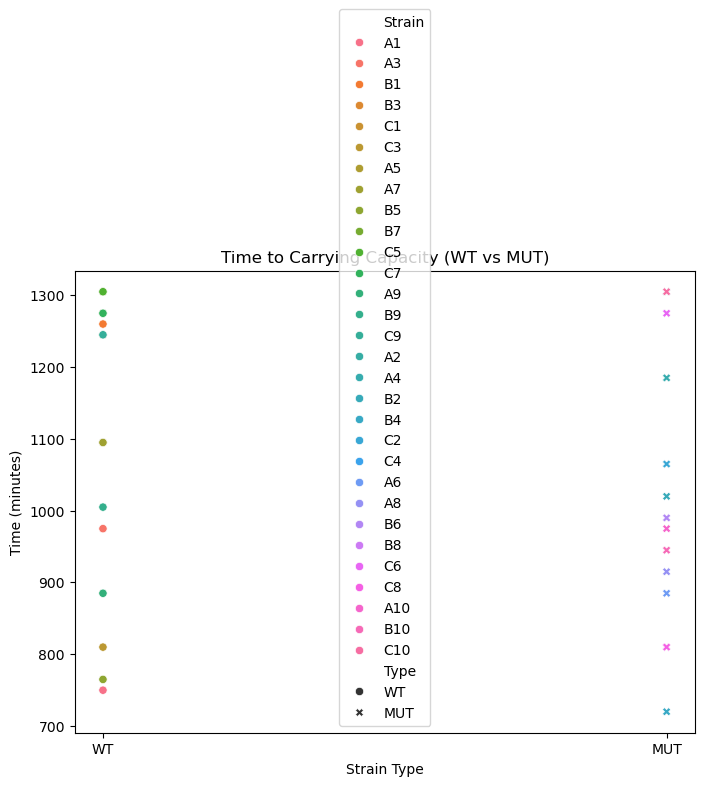

In [9]:
# Step 5: Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=carrying_df, x="Type", y="Time_to_Carrying_Capacity", hue="Strain", style="Type")
plt.title("Time to Carrying Capacity (WT vs MUT)")
plt.xlabel("Strain Type")
plt.ylabel("Time (minutes)")
plt.show()

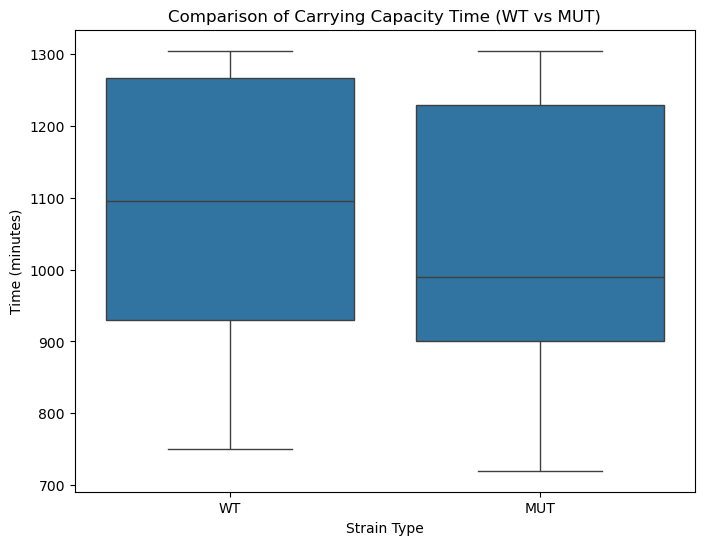

In [10]:
# Step 6: Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=carrying_df, x="Type", y="Time_to_Carrying_Capacity")
plt.title("Comparison of Carrying Capacity Time (WT vs MUT)")
plt.xlabel("Strain Type")
plt.ylabel("Time (minutes)")
plt.show()

In [11]:
# Step 7: Perform statistical test (t-test)
wt_values = carrying_df[carrying_df["Type"] == "WT"]["Time_to_Carrying_Capacity"].dropna()
mut_values = carrying_df[carrying_df["Type"] == "MUT"]["Time_to_Carrying_Capacity"].dropna()

t_stat, p_value = stats.ttest_ind(wt_values, mut_values, equal_var=False)

In [12]:
# Step 8: Interpretation of statistical results
if p_value < 0.05:
    print(f"Statistically Significant Difference (p = {p_value:.3f})")
else:
    print(f"No Significant Difference (p = {p_value:.3f})")

No Significant Difference (p = 0.488)


### Observations & Insights
#### Growth Patterns:
Both wild-type (WT) and mutant (MUT) strains grow in a pretty similar way overall.

Some mutant strains show slight differences, but nothing too dramatic.

#### Time to Carrying Capacity:
Looking at the scatter and box plots, we see some variation in how long each strain takes to reach carrying capacity.

But there’s no obvious trend where WT or MUT strains consistently reach carrying capacity faster or slower.

#### Statistical Test (t-test):
The p-value is 0.488, which is greater than 0.05—meaning there’s no significant difference between WT and MUT in terms of carrying capacity time.

In other words, based on this dataset, knocking out the gene doesn’t really affect how quickly the strains reach their max population.
